1.Loading and Exploring the Fashion MNIST Dataset


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data size: (60000, 28, 28)
Test data size: (10000, 28, 28)


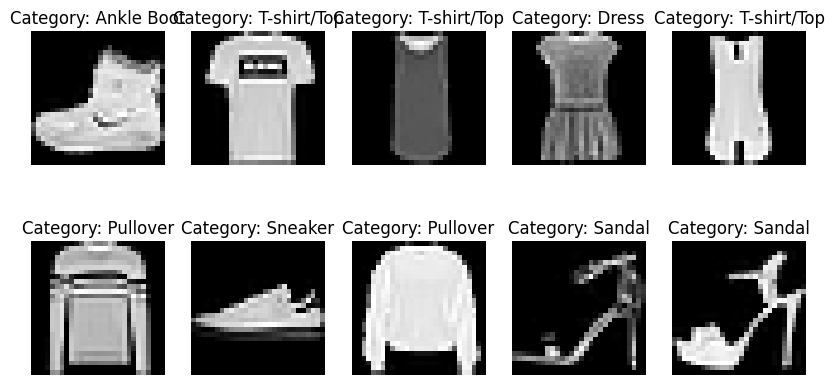

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# تحميل بيانات Fashion MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# قائمة بأسماء الفئات (ترتيبًا حسب الأرقام من 0 إلى 9)
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# طباعة حجم بيانات التدريب والاختبار
print(f"Training data size: {X_train.shape}")
print(f"Test data size: {X_test.shape}")

# عرض بعض العينات من البيانات مع أسماء الفئات
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap="gray")  # عرض الصورة باللون الرمادي
    ax.set_title(f"Category: {class_names[y_train[i]]}")  # عرض اسم الفئة
    ax.axis("off")  # إخفاء الإطار

plt.show()


2.Data Preprocessing and Normalization


In [ ]:
from sklearn.preprocessing import StandardScaler

# تحويل الصور إلى مصفوفات 1D (تحويلها من 28x28 إلى 784 قيمة)
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# تطبيع البيانات لتكون القيم بين 0 و 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)

# طباعة شكل البيانات بعد التحويل
print(f"Data shape after transformation: {X_train_scaled.shape}")



Data shape after transformation: (60000, 784)


3.Applying K-Means Clustering


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
# تحديد عدد التجمعات (10 مجموعات لأن لدينا 10 أصناف من الملابس)
num_clusters  = 10

# تطبيق خوارزمية K-Means
kmeans = KMeans(n_clusters=num_clusters , random_state=42, n_init=10)
labels = kmeans.fit_predict(X_train_scaled)

# حفظ التجمعات في DataFrame
df_clusters = {"Image_Index": np.arange(len(labels)), "Cluster": labels}
df_clusters = pd.DataFrame(df_clusters)

print("Cluster distribution:")
print(df_clusters["Cluster"].value_counts())


Cluster distribution:
Cluster
8    9276
4    9100
5    7997
0    7700
3    7422
9    6718
6    4656
2    2489
1    2351
7    2291
Name: count, dtype: int64


4.Visualizing Clusters using PCA


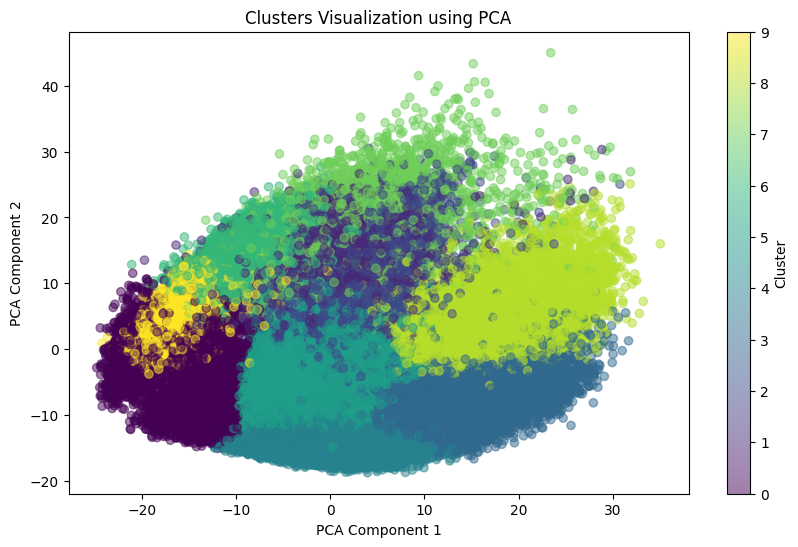

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# تقليل الأبعاد إلى 2D باستخدام PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# عرض النتائج في رسم بياني
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.5)
plt.colorbar(label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters Visualization using PCA")
plt.show()


5.Cluster Analysis and Sample Visualization

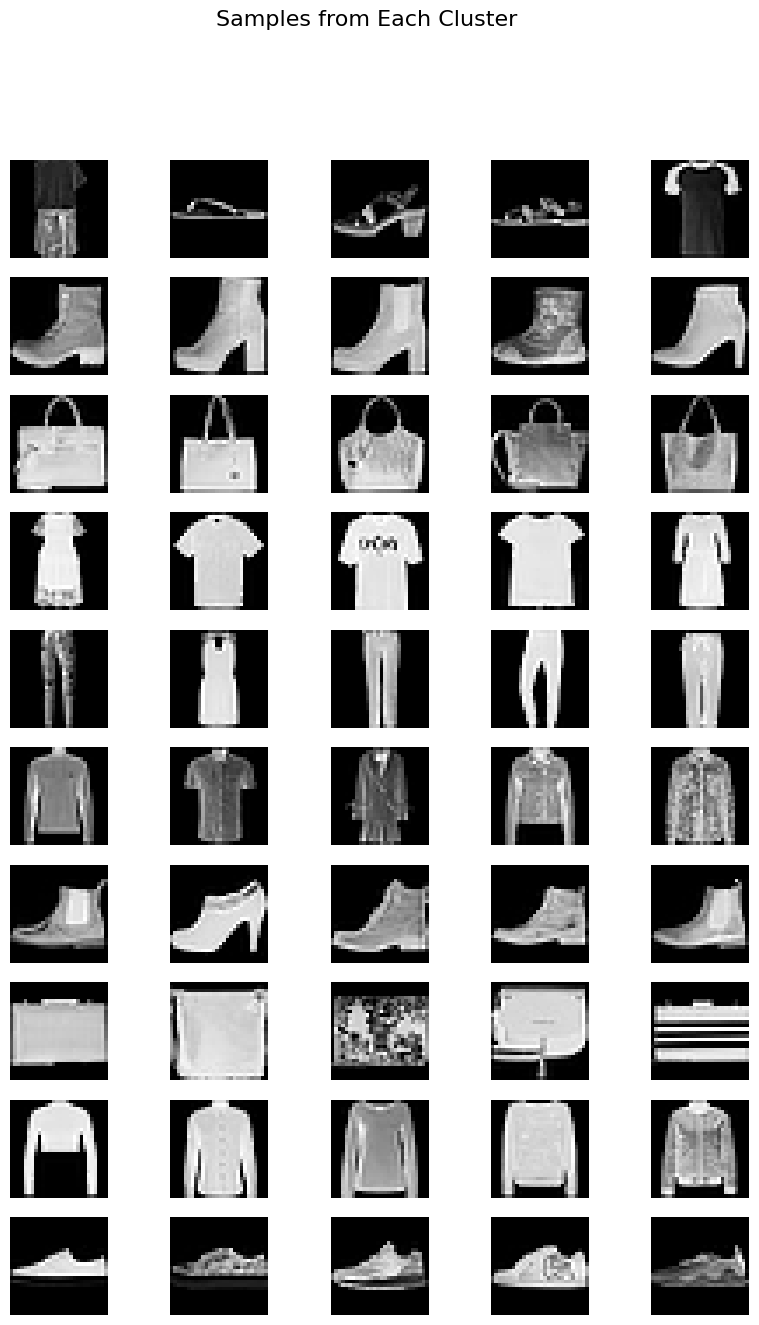

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# عدد التجمعات (نفس قيمة K المستخدمة في K-Means)
num_clusters = 10

# إنشاء رسم يحتوي على صور من كل مجموعة
fig, axes = plt.subplots(num_clusters, 5, figsize=(10, 15))  # 10 صفوف × 5 صور لكل مجموعة

for cluster in range(num_clusters):
    # الحصول على جميع الصور التي تنتمي لهذا التجمع
    cluster_indices = np.where(labels == cluster)[0]

    # اختيار 5 صور عشوائية من هذه المجموعة
    selected_indices = np.random.choice(cluster_indices, 5, replace=False)

    # عرض الصور
    for i, img_idx in enumerate(selected_indices):
        axes[cluster, i].imshow(X_train[img_idx], cmap="gray")
        axes[cluster, i].axis("off")

    # تسمية الصف برقم المجموعة
    axes[cluster, 0].set_ylabel(f"Cluster {cluster}", fontsize=12, rotation=90, labelpad=10)

plt.suptitle("Samples from Each Cluster", fontsize=16)
plt.show()


6.Evaluating Clustering Performance


In [ ]:
# استيراد المكتبات اللازمة لحساب مقاييس التقييم
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# حساب Silhouette Score (كلما كان أقرب إلى 1، كان التجميع أفضل)
silhouette_avg = silhouette_score(X_train_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# حساب Davies-Bouldin Index (كلما كان أصغر، كان التجميع أفضل)
db_score = davies_bouldin_score(X_train_scaled, labels)
print(f"Davies-Bouldin Index: {db_score:.4f}")

# حساب Calinski-Harabasz Index (كلما كان أكبر، كان التجميع أفضل)
ch_score = calinski_harabasz_score(X_train_scaled, labels)
print(f"Calinski-Harabasz Index: {ch_score:.4f}")


Silhouette Score: 0.1265
Davies-Bouldin Index: 2.0652
Calinski-Harabasz Index: 5325.6864


# خطوات مشروع تحليل بيانات Fashion MNIST باستخدام K-Means و PCA

---

## الخطوة الأولى: تحميل البيانات وعرض بعض الصور

- **تحميل البيانات باستخدام TensorFlow:**
  - تحميل بيانات Fashion MNIST التي تحتوي على:
    - 60,000 صورة تدريب (X_train) مع التصنيفات (y_train).
    - 10,000 صورة اختبار (X_test) مع التصنيفات (y_test).
    
- **عرض الصور مع أسماء الفئات:**
  - بعد تحميل البيانات، يتم عرض بعض الصور مع أسماء الفئات المحددة في القائمة `class_names`.
  - كل فئة تمثل نوعًا معينًا من الملابس.

- **النتائج المتوقعة:**
  - حجم بيانات التدريب: (60000, 28, 28)
  - حجم بيانات الاختبار: (10000, 28, 28)
  - عرض 10 صور من بيانات التدريب مع عناوين توضح فئة الملابس (مثل T-shirt, Sneaker, Dress، ...).
  - الصور تعرض باللون الرمادي باستخدام `cmap="gray"`.

---

## الخطوة الثانية: تجهيز البيانات لخوارزمية K-Means

- **تحويل الصور إلى متجهات:**
  - تحويل كل صورة بحجم 28×28 إلى مصفوفة تحتوي على 784 قيمة (flatten).

- **تطبيع البيانات:**
  - تطبيع القيم بحيث يصبح المتوسط 0 والانحراف المعياري 1، مما يجعل القيم أكثر توازنًا ويساهم في تحسين أداء النماذج.

---

## الخطوة الثالثة: تطبيق خوارزمية K-Means

- **تحديد عدد التجمعات:**
  - تعيين عدد التجمعات `K=10` بما يتوافق مع عدد الفئات الفعلية.

- **تنفيذ خوارزمية K-Means:**
  - تطبيق الخوارزمية على البيانات بعد التطبيع.
  
- **تحليل النتائج:**
  - حفظ نتائج التجميع في DataFrame لعرض عدد الصور في كل مجموعة.
  - استخدام `value_counts()` لطباعة توزيع الصور حسب التجمعات.

---

## الخطوة الرابعة: تقليل الأبعاد باستخدام PCA ورسم النتائج

- **تطبيق PCA:**
  - استخدام `PCA(n_components=2)` لتقليل الأبعاد من 784 إلى 2.
  - تحويل البيانات المطابقة (X_train_scaled) إلى الفضاء الجديد (X_pca).

-
